In [100]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [101]:
hr_df = pd.read_csv('hr.csv')
hr_df.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [102]:
hr_df.apply(lambda x: sum(x.isnull()), axis=0)

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [103]:
hr_df[hr_df.isnull().any(axis=1)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54742,38935,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0


In [104]:
hr_df.previous_year_rating = hr_df['previous_year_rating'].fillna(0)

In [105]:
hr_df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [106]:
hr_df.education = hr_df.education.fillna(hr_df.education.mode()[0])

In [107]:
hr_df.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


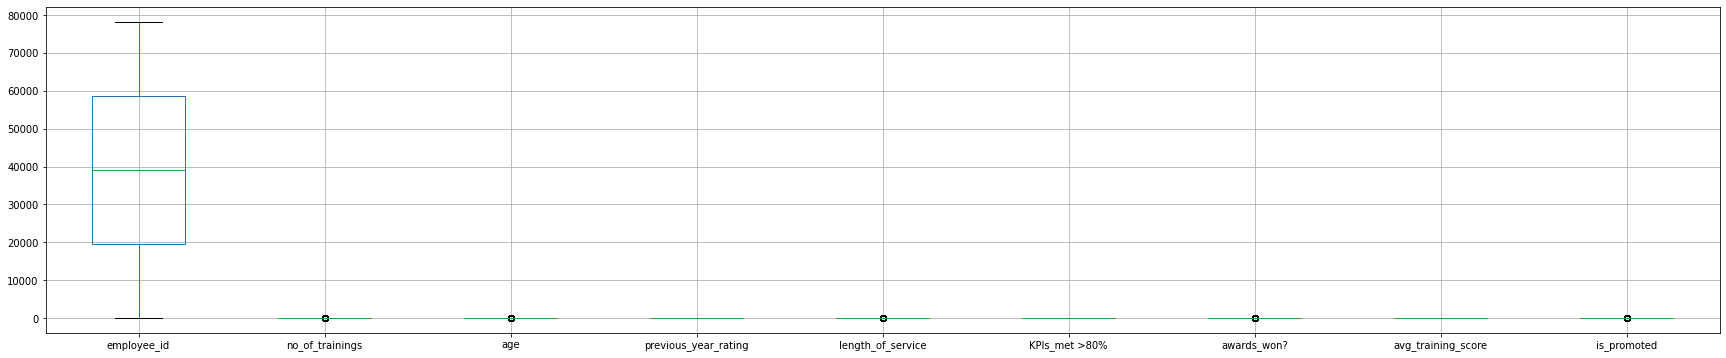

In [108]:
hr_df.boxplot(figsize=(30,6))

In [109]:
for category in hr_df.columns:
    print (hr_df[category].value_counts())

2047     1
19228    1
4887     1
6934     1
789      1
        ..
71176    1
44543    1
48637    1
36347    1
4098     1
Name: employee_id, Length: 54808, dtype: int64
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_

In [110]:
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [111]:
#nominal data
#department is categorical 
#region is categorical
#gender is categorical
#recruitment channel is categorical

#education is categorical with order
# the rest have order

In [112]:
cat_var = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for category in cat_var:
    hr_df[category] = hr_df[category].astype('category')
    hr_df[category] = hr_df[category].cat.codes

In [113]:
hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [114]:
# the 4 aformentioned categories need to be one hot encoded
hr_df = pd.get_dummies(hr_df, columns=['department', 'region', 'gender', 'recruitment_channel'])
hr_df.head()

,employee_id,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_29,region_30,region_31,region_32,region_33,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,65438,2,1,35,5.0,8,1,0,49,0,...,0,0,1,0,0,1,0,0,0,1
1,65141,0,1,30,5.0,4,0,0,60,0,...,0,0,0,0,0,0,1,1,0,0
2,7513,0,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,0,1,0,0,1
3,2542,0,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,0,1,1,0,0
4,48945,0,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,1,1,0,0


In [115]:
X = hr_df.drop(columns=['employee_id', 'is_promoted'])
X.head()

,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_0,department_1,...,region_29,region_30,region_31,region_32,region_33,gender_0,gender_1,recruitment_channel_0,recruitment_channel_1,recruitment_channel_2
0,2,1,35,5.0,8,1,0,49,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,1,30,5.0,4,0,0,60,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,1,34,3.0,7,0,0,50,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,2,39,1.0,10,0,0,50,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,0,0,1,1,0,0


In [116]:
y=hr_df.is_promoted
print(X.shape, y.shape)

(54808, 56) (54808,)


In [117]:
X.dtypes
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [119]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as logR
from sklearn import metrics

In [120]:
dt = DT(max_depth=5).fit(X_train, y_train)
yhat = dt.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.9272368997226682

In [121]:
lr = logR(C=0.01).fit(X_train, y_train)
yhat = lr.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.926580061304919

In [122]:
metrics.confusion_matrix(y_test,yhat)

array([[12499,    35],
       [  971,   197]])

In [123]:
Ks=2
mean_acc = np.zeros(Ks-1)
for k in range(1, Ks):
    knn = KNN(n_neighbors=k).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test,yhat)
    print(k)

k = mean_acc.argmax()+1
k

1


1

In [124]:
knn = KNN(n_neighbors=k).fit(X_train, y_train)
yhat= knn.predict(X_test)
metrics.accuracy_score(y_test, yhat)

0.8878995767041308

In [125]:
metrics.confusion_matrix(y_test,yhat)

array([[11879,   655],
       [  881,   287]])

In [126]:
df = pd.DataFrame(data = lr.coef_[0], index= X.columns, columns = ['coefficients'])
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
df.plot(kind='bar', figsize=(20,6))

In [ ]:
X.head()

In [ ]:
X_new = X[['KPIs_met >80%', 'awards_won?', 'department_0', 'department_6', 'department_7', 'department_8', 'gender_0', 'gender_1', 'recruitment_channel_0', 'recruitment_channel_1', 'recruitment_channel_2']]

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y)

In [ ]:
lr = logR().fit(X_train, y_train)
yhat = lr.predict(X_test)
metrics.accuracy_score(y_test, yhat)

In [ ]:
metrics.confusion_matrix(y_test, yhat)

In [ ]:
Ks=15
mean_acc = np.zeros(Ks-1)
for k in range(1, Ks):
    knn = KNN(n_neighbors=k).fit(X_train,y_train)
    yhat = knn.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test,yhat)
    print(k)

k = mean_acc.argmax()+1
k

In [ ]:
knn = KNN(n_neighbors=k).fit(X_train, y_train)
yhat= knn.predict(X_test)
metrics.accuracy_score(yn_test, yhat)

In [ ]:
metrics.confusion_matrix(y_test, yhat)

In [ ]:
depths = 20
mean_acc = np.zeros(depths-1)
for depth in range(1,depths):
    dt = DT(max_depth=depth).fit(X_train,y_train)
    yhat=dt.predict(X_test)
    mean_acc[depth-1] = metrics.accuracy_score(y_test, yhat)
depth = mean_acc.argmax()+1
dt = DT(max_depth = depth).fit(X_train, y_train)
yhat = dt.predict(X_test)
metrics.accuracy_score(y_test, yhat)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(yhat, y_test)

In [ ]:
yhat

In [ ]:
metrics.confusion_matrix(y_test, yhat)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF

In [ ]:
rf = RF(n_estimators=200).fit(X_train, y_train)
yhat = rf.predict(X_test)
metrics.accuracy_score(y_test,yhat)

In [ ]:
metrics.confusion_matrix(y_test,yhat)

In [ ]:
depth

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 200).fit(X_train, y_train)
yhat = abc.predict(X_test)
metrics.accuracy_score(y_test, yhat)


In [ ]:
metrics.confusion_matrix(y_test, yhat)

In [ ]:
dt.feature_importances_

In [ ]:
df = pd.DataFrame(data = dt.feature_importances_, index= X.columns, columns = ['coefficients'])
df.head()

In [ ]:
df.plot(kind='bar', figsize=(20,6))

In [ ]:
X_new = X[['previous_year_rating','KPIs_met >80%', 'awards_won?', 'avg_training_score','department_0', 'department_4', 'department_5','department_7']]

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y)

In [ ]:
depths = 20
mean_acc = np.zeros(depths-1)
for depth in range(1,depths):
    dt = DT(max_depth=depth).fit(Xn_train,yn_train)
    yhat=dt.predict(Xn_test)
    mean_acc[depth-1] = metrics.accuracy_score(yn_test, yhat)
depth = mean_acc.argmax()+1
dt = DT(max_depth = depth).fit(Xn_train, yn_train)
yhat = dt.predict(Xn_test)
metrics.accuracy_score(yn_test, yhat)

In [ ]:
metrics.confusion_matrix(yn_test,yhat)